<a href="https://colab.research.google.com/github/subrotosingha4/Machine-Learning/blob/master/Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning: 

- if data is not labeled then if we run ML algorithms using these data then the learning process is known as unsupervised learning
- common unsupervised learning algorithms: clustering, neural networks, anomaly detection
- the goal of this clustering algorithm is to find pattern in the data

# Types of clustering and explanation
- Hierarchical clustering: cluster the data following a hierarchy
- k means clustering: cluster the data points based on centroid

# Hierarchical Clustering

- Types: 
1. **Agglomerative**:
- The basic algorithm of Agglomerative is straight forward.
- Compute the proximity matrix
Let each data point be a cluster
- Repeat: Merge the two closest clusters and update the proximity matrix
- Until only a single cluster remains

2. **Divisive**: not much used in real-world

- Note: Hierarchical clustering uses **Dendogram** or tree like structure to represent the hierarchy and visualization

- How to calculation similarity between data points:

- Calculating the similarity between two clusters is important to merge or divide the clusters. There are certain approaches which are used to calculate the similarity between two clusters:
Let, C1 is cluster-1 and C2 is cluster-2; Pi data points belong to C1 and Pj data points belong C2
- **MIN**: Can be mathematically written as:
- *Sim(C1,C2) = Min Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2*
- The mathematical equation is self-exploratory 
- Read the equation as: similarity between cluster1(C1) and cluster2(C2) can be computed by taking minimum distance between points Pi and Pj
- **MAX**: similarly MIN,
- *Sim(C1,C2) = Max Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2*
- **Group Average**: *sim(C1,C2) = ∑ sim(Pi, Pj)/|C1|*|C2|*
- **Ward’s Method**: *sim(C1,C2) = ∑ (dist(Pi, Pj))²/|C1|*|C2|*

There are two modules in **SciPy** that can offer clustering methods. 

- cluster.vq
- cluster.hierarchy

- cluster.vq.whiten(): This method is used to normalize the data points.

# Implement Hierarchical Clustering using Ward Similarity metric

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

In [6]:
x = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame(
    {   'x': x,
        'y': y}
      )

In [7]:
#create the linkage using ward method
Z = linkage(df, 'ward')
#we define three clusters
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

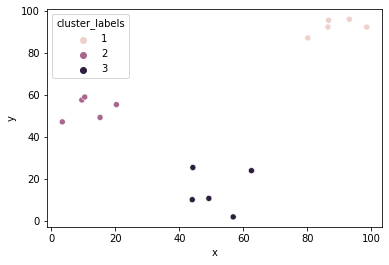

In [8]:
#plot the predicted cluster
sns.scatterplot(x='x', y='y',
hue='cluster_labels', data = df)
plt.show()

# FIFA 18: using Hierarchical Clustering

FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [28]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


# Create a dendrogram

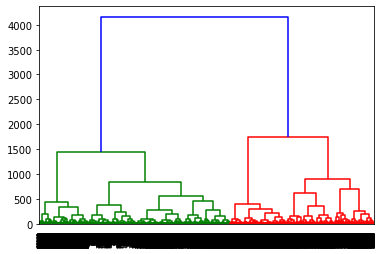

In [15]:
from scipy.cluster.hierarchy import dendrogram
Z = linkage(
    fifa[['sliding_tackle', 'aggression']],
    method='ward',
    metric='euclidean')

dn = dendrogram(Z)

plt.show()

# Normaize

x_new = x / std_dev(x)

In [29]:
from scipy.cluster.vq import whiten

fifa[['scaled_sliding_tackle','scaled_aggression']]=whiten(fifa[['sliding_tackle','aggression']])


# Perform Hierarchical Clustering

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


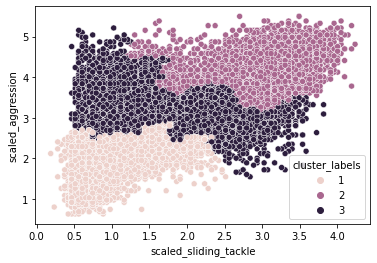

In [30]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Use the linkage() function using other similarity methods
#uncomment to run your preferred method and see which is performing better
#distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method = 'ward', metric = 'euclidean')
#distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method = 'complete', metric = 'euclidean')
#distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method = 'single', metric = 'euclidean')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

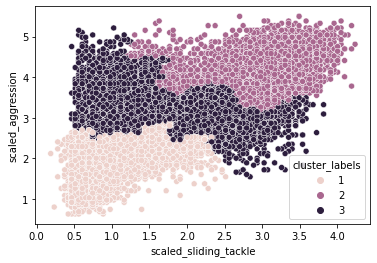

In [35]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='scaled_sliding_tackle', 
                y='scaled_aggression', 
                hue='cluster_labels', 
                data=fifa)
plt.show()

# Output Dendogram

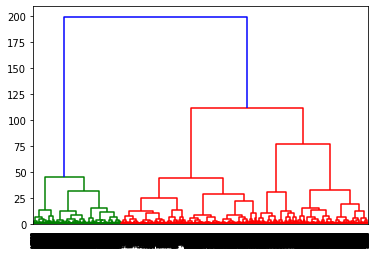

In [27]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

# K means clustering
- the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

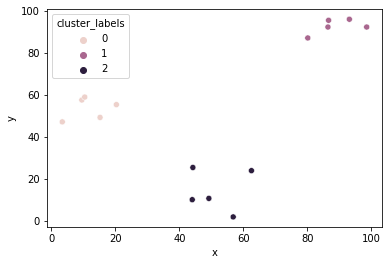

In [9]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 3)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

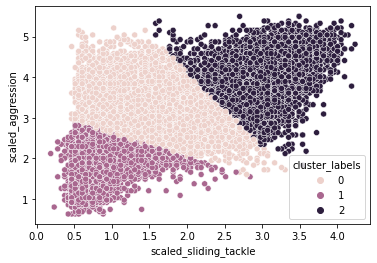

In [51]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 3)

# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_sliding_tackle', 'scaled_aggression']], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', 
                hue='cluster_labels', data = fifa)
plt.show()

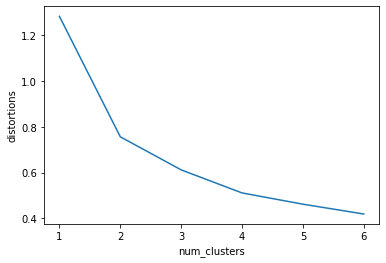

In [52]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

- So our previous assumption of three cluster is not completely right as we can see from elbow method that shows there may be two cluster for the dataset.

Uniform data distribution may need different tactics for clustering. This is the scope of this writing.

- Each technique has its pros and cons
- Consider your data size and pa2erns before deciding on algorithm
- Clustering is exploratory phase of analysis

# Real-world application of Clustering
- Dominant color in a RGB image can be identified using clustering
- Different terrain such as water, mountain etc can be clustered from Sattelite images
- Lets see an example of image color dominance clustering using k means clustering 

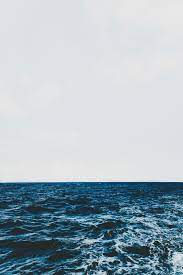

- Convert image to pixels: matplotlib.image.imread
- Display colors of cluster centers: matplotlib.pyplot.imshow

In [55]:
# Import image class of matplotlib
import matplotlib.image as img

r=[]
g=[]
b=[]
# Read batman image and print dimensions
sea_image = img.imread('/Image.jpg')
print(sea_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in sea_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(275, 183, 3)


In [57]:
sea_df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

sea_df.head()

,red,blue,green
0,225,231,226
1,225,231,226
2,225,231,226
3,225,231,226
4,225,231,226


- scale the values:

In [59]:
from scipy.cluster.vq import whiten

sea_df[['scaled_red','scaled_blue','scaled_green']]=whiten(sea_df[['red','blue','green']])


- elbow method to check number of clusters: guess is two since two dominant colors

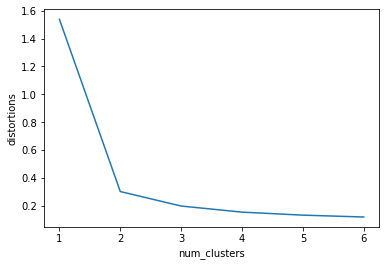

In [60]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(sea_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

- found 2 cluster thus our guess was right

# Display dominant color

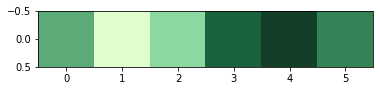

In [62]:
colors=[]
# Get standard deviations of each color
r_std, g_std, b_std = sea_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

- That may be correct! Six colors resemble the three that are indicative from visual inspection of the image

# Document clustering

1. Clean data before processing
2. Determine the importance of the terms in a document (in TF-IDF matrix)
3. Cluster the TF-IDF matrix
4. Find top terms, documents in each cluster

- TF-DF: in simple, returns most important terms in the language

In [63]:
plots=pd.read_csv('movies_plot.csv')
plots.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


- Convert text into smaller parts called tokens, clean data for processing

In [71]:
!pip install nltk

In [74]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [80]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words= []):
  tokens=word_tokenize(text)
  cleaned_tokens=[]

  for token in tokens:
    token=re.sub('[^A-Za-z0-9]+','',token)
    if len(token)>1 and token.lower() not in stop_words:
      #GEt lowercase
      cleaned_tokens.append(token.lower())
      return cleaned_tokens

- TF-IDF of movie plots

In [76]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

- successfully created the sparse matrix. Let us now perform clustering on the matrix

In [77]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['title', 'plot']
['plot', 'title']


-  positive, warm words in the first cluster and words referring to action in the second cluster